# Image Classification Using CNN

## Objectives
- build image classification CNN using python on the ImageNet datasets.
- CNNs work for the image classification task
- using TensorFlow’s Keras library to demonstrate image classification using CNNs

## Dataset

There are various datasets that you can leverage for applying convolutional neural networks. Here are three popular datasets:

- MNIST
- CIFAR-10
- ImageNet

## Import Libraries

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims, argmax

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Download the Imagenette dataset

In [2]:
#!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

In [3]:
#!tar -xf imagenette2.tgz

## Global variables

In [7]:
path = 'imagenette2/'
batch_size  = 32
input_shape = (224, 224, 3)

## 1. Preparing the Dataset

Uses techniques to generate new images from existing ones (applying random transformations: distortion, rotation, zoom, etc.) for datasets with few images. Obviously, the more images to train, the better the model.

In [24]:
# create a new generator
imagegen = ImageDataGenerator()

#train_image_gen = ImageDataGenerator(
#    rotation_range=30,
#    rescale=1./255,
#    width_shift_range=0.1,
#    height_shift_range=0.1,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'
#)

#test_image_gen = ImageDataGenerator(rescale = 1./255)

In [25]:
# load train data
train = imagegen.flow_from_directory(path + "train/", class_mode="categorical", shuffle=False, batch_size=batch_size, target_size=(224, 224))
#train = train_image_gen.flow_from_directory(path + "train/", class_mode="categorical", shuffle=False, batch_size=batch_size, target_size=(224, 224))

# load val data
val = imagegen.flow_from_directory(path + "val/", class_mode="categorical", shuffle=False, batch_size=batch_size, target_size=(224, 224))
#val = test_image_gen.flow_from_directory(path + "val/", class_mode="categorical", shuffle=False, batch_size=batch_size, target_size=(224, 224))

classes = list(train.class_indices.keys())

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


### List of the 10 classes to classify extracted from the training set.

In [26]:
print(classes)

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


In [27]:
imagenette_map = { 
    "n01440764" : "tench",
    "n02102040" : "springer",
    "n02979186" : "casette_player",
    "n03000684" : "chain_saw",
    "n03028079" : "church",
    "n03394916" : "French_horn",
    "n03417042" : "garbage_truck",
    "n03425413" : "gas_pump",
    "n03445777" : "golf_ball",
    "n03888257" : "parachute"
}

## 2. Building the model
The trained network (structure and weights) is recorded, so that it can be used again later.

In [30]:
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=input_shape))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fit on data for 30 epochs
#results1 = model.fit_generator(train, epochs=30, validation_data=val)
results1 = model.fit_generator(train, epochs=30, steps_per_epoch=150, validation_data=val, validation_steps=15)

# salve model trained
model.save('cnn_model.h5')

Epoch 1/30


2024-01-29 14:37:36.104810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


150/150 [==============================] - ETA: 0s - loss: 2.3822 - accuracy: 0.2006

2024-01-29 14:38:20.434463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


150/150 [==============================] - 46s 306ms/step - loss: 2.3822 - accuracy: 0.2006 - val_loss: 2.6205 - val_accuracy: 0.0625
Epoch 2/30
150/150 [==============================] - 45s 302ms/step - loss: 1.9356 - accuracy: 0.3498 - val_loss: 1.7732 - val_accuracy: 0.4375
Epoch 3/30
150/150 [==============================] - 45s 302ms/step - loss: 1.7021 - accuracy: 0.4217 - val_loss: 1.7244 - val_accuracy: 0.4187
Epoch 4/30
150/150 [==============================] - 715s 5s/step - loss: 1.4271 - accuracy: 0.5166 - val_loss: 1.7988 - val_accuracy: 0.3896
Epoch 5/30
150/150 [==============================] - 45s 300ms/step - loss: 1.3231 - accuracy: 0.5510 - val_loss: 1.3955 - val_accuracy: 0.5813
Epoch 6/30
150/150 [==============================] - 45s 301ms/step - loss: 1.1154 - accuracy: 0.6156 - val_loss: 1.9596 - val_accuracy: 0.4333
Epoch 7/30
150/150 [==============================] - 76s 508ms/step - loss: 0.9469 - accuracy: 0.6792 - val_loss: 2.1869 - val_accuracy: 0.387

### Model architecture summary

In [31]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 224, 224, 25)      1900      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 112, 112, 25)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 56, 56, 50)        31300     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 28, 28, 50)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 50)       200       
 chNormalization)                                                
                                                     

### Printing val_loss history

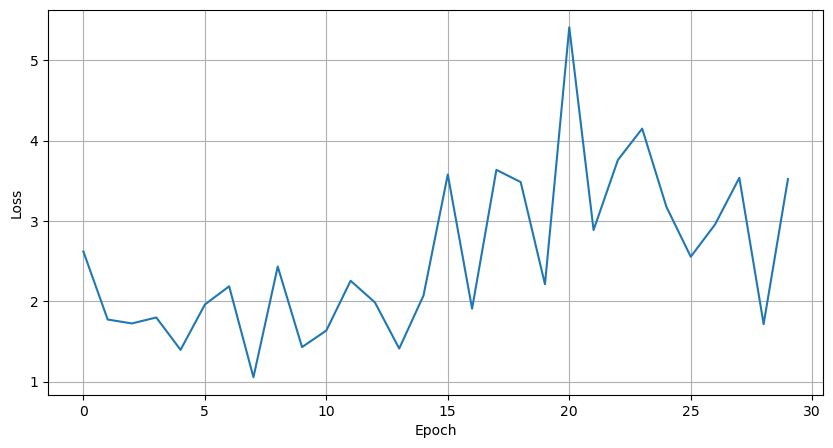

In [32]:
plt.figure(figsize=(10,5))
plt.plot(results1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('loss_cnn.png')

### Printing val_accuracy history

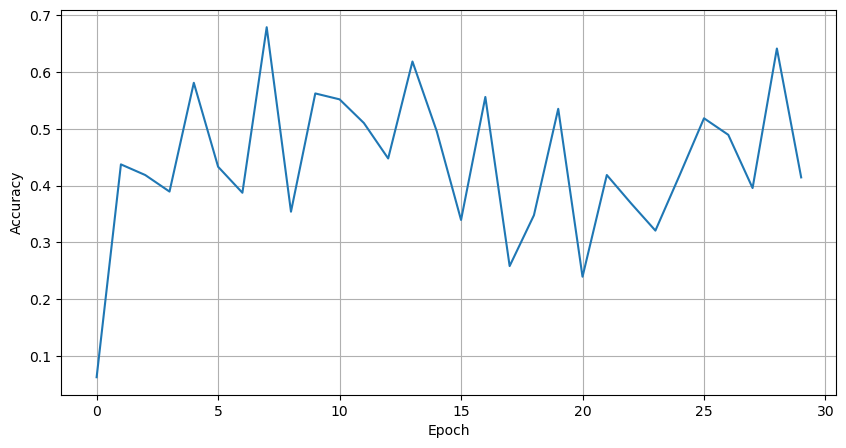

In [33]:
plt.figure(figsize=(10,5))
plt.plot(results1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('accuracy_cnn.png')

## 3. Transfer learning (VGG16) to improve accuracy

### Downloading weights of VGG16

In [34]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')

pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Generate features from VGG16

#### Extract useful features that VGG16 already knows from our dataset’s images

In [35]:
from keras.utils import to_categorical

# extract train and val features
vgg_train = pretrained_model.predict(train)
vgg_test = pretrained_model.predict(val)

2024-01-29 15:16:55.086670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


296/296 [==============================] - 627s 2s/step


2024-01-29 15:27:22.917015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


123/123 [==============================] - 256s 2s/step


#### OHE target column

In [36]:
train_target = to_categorical(train.labels)
test_target = to_categorical(val.labels)

#### Once the above features are ready, use them for training a basic, Fully Connected Neural Network in Keras

In [41]:
model2 = Sequential()
model2.add(Flatten(input_shape=((7,7,512))))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [42]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_38 (Dense)            (None, 100)               2508900   
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 batch_normalization_15 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2,510,310
Trainable params: 2,510,110
Non-trainable params: 200
_________________________________________

#### Train model using features generated from VGG16 model

In [43]:
results2 = model2.fit(vgg_train, train_target, epochs=50, batch_size=128, validation_data=(vgg_test, test_target))

# salve model trained
model2.save('fcnn_vgg_model.h5')

Epoch 1/50
74/74 [==============================] - 1s 8ms/step - loss: 0.4290 - accuracy: 0.8841 - val_loss: 0.2227 - val_accuracy: 0.9302
Epoch 2/50
74/74 [==============================] - 1s 7ms/step - loss: 0.1277 - accuracy: 0.9785 - val_loss: 0.1807 - val_accuracy: 0.9445
Epoch 3/50
74/74 [==============================] - 1s 7ms/step - loss: 0.0628 - accuracy: 0.9916 - val_loss: 0.1721 - val_accuracy: 0.9462
Epoch 4/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0358 - accuracy: 0.9974 - val_loss: 0.1660 - val_accuracy: 0.9478
Epoch 5/50
74/74 [==============================] - 1s 7ms/step - loss: 0.0239 - accuracy: 0.9981 - val_loss: 0.1641 - val_accuracy: 0.9501
Epoch 6/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0159 - accuracy: 0.9992 - val_loss: 0.1646 - val_accuracy: 0.9490
Epoch 7/50
74/74 [==============================] - 1s 7ms/step - loss: 0.0136 - accuracy: 0.9990 - val_loss: 0.1700 - val_accuracy: 0.9457
Epoch 8/50
74/74 [==

### Printing val_loss history

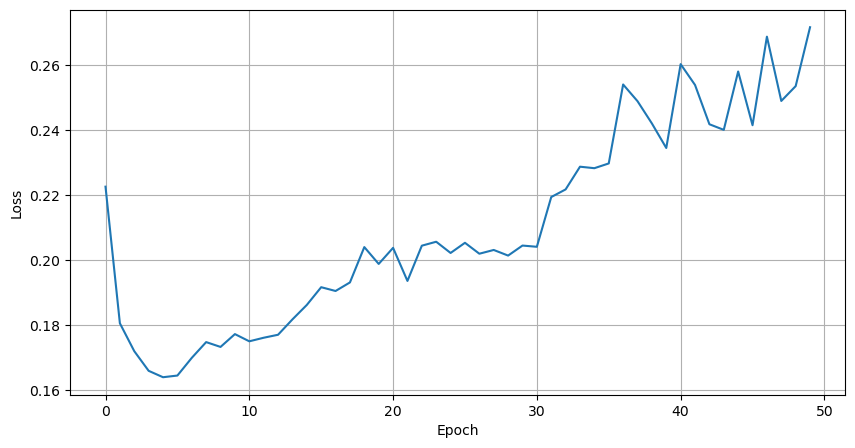

In [44]:
plt.figure(figsize=(10,5))
plt.plot(results2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('loss_fcnn_vgg.png')

### Printing val_accuracy history

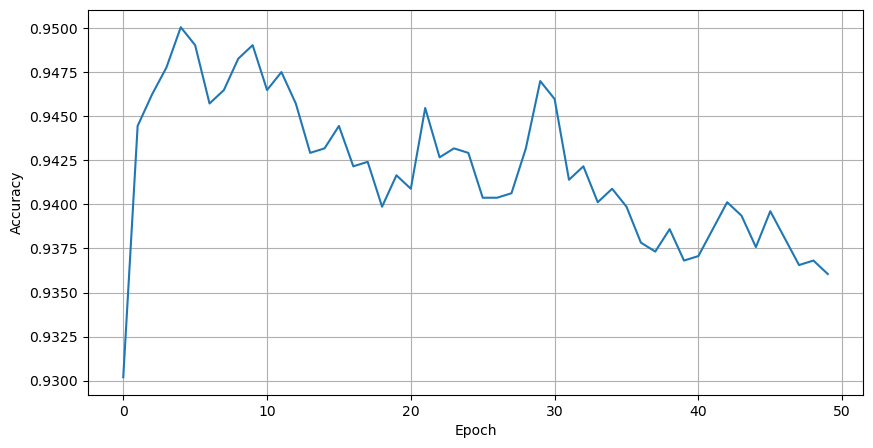

In [45]:
plt.figure(figsize=(10,5))
plt.plot(results2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('accuracy_fcnn_vgg.png')

## 4. Load a previously trained network and ask it to identify the images.

In [55]:
import keras.utils as image
import numpy as np

#cnn = load_model('fcnn_vgg_model.h5')
cnn = load_model('cnn_model.h5')

for i in range(0, 6):
    file = 'images/unknown-' + str(i) + '.JPEG'
    img = image.load_img(file, target_size = (224,224))
    y = cnn.predict(expand_dims(image.img_to_array(img), axis = 0))
    class_name = imagenette_map.get(classes[argmax(y)], "Unidentified image")    
    print('Image in:', file, ':', class_name)

1/1 [==============================] - 0s 39ms/step
Image in: images/unknown-0.JPEG : tench
1/1 [==============================] - 0s 12ms/step
Image in: images/unknown-1.JPEG : gas_pump
1/1 [==============================] - 0s 11ms/step
Image in: images/unknown-2.JPEG : garbage_truck
1/1 [==============================] - 0s 11ms/step
Image in: images/unknown-3.JPEG : church
1/1 [==============================] - 0s 11ms/step
Image in: images/unknown-4.JPEG : garbage_truck
1/1 [==============================] - 0s 11ms/step
Image in: images/unknown-5.JPEG : gas_pump
